# Анализ игровой индустрии

# Описание проекта  
Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования:**  
* Выявить закономерности, определяющие успешность игры для планирования рекламных кампаний

**Ход исследования:**  
* Изучение общей информации датасета
* Замена пропусков в данных и удаление строк с малым количеством пропусков в столбцах
* Добавление столбца с общей суммой продаж по всем регионам для более полного анализа
* Проведение анализа игр
* Проведение анализа платформ
* Изучение зависимостей продаж от отзывов критиков и пользователей
* Исследование платформ и жанров
* Анализ продаж по регионам
* Проверка влияния рейтинга ESRB на продажи по регионам
* Проверка гипотез
* Общий вывод исследования

**Импортируем библиотеки**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy import stats as st

# Шаг 1. Откроем файл с данными и изучим общую информацию

In [2]:
#Откроем файл и сохраним его в переменной data
data = pd.read_csv('games.csv')

In [3]:
#Посмотрим наличие пропусков и тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Посмтотрим общую информацию
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
#Выведем первые 10 строк датафрейма
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
#Посмотрим количество пропусков
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
#Проверим % пропусков в датасете
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


**Вывод:** 
В столбцах Critic_Score, User_Score, Rating очень много пропусков. В столбцах Name, Year_of_Release пропусков практически нет, от строк с пропущенными значениями в этих столбцах можно избавиться. Названия столбцов указаны с использованием разных регистров одновременно. Типы данных в столбцах Year_of_Release, User_Score не соответствуют значениям в этих столбцах.  
Пропуски в столбцах Critic_Score, User_Score могут быть связаны с тем, что раньше не практиковалось оценивать игры, соответственно и некоторых оценок в столбцах нет. Заменить пропуски медианой или средним было бы неправильно, т.к. есть вероятность поставить хорошую оценку плохой игре и наоборот. К тому же, результаты исследования могут из-за этого исказиться. Поэтому пропуски лучше заменить на '-1', чтобы данные по ним не попали в выборку с другими значениями.  
Пропуски в столбце Rating скорее всего связаны с тем, что ESRB образовалась позже, чем были созданы игры, данные по которым есть в датафрейме. Заменим пропуски на 'without_esrb'.
Исходя из полученной информации, нам нужно обработать данные, прежде чем работать с ними:  
* Привести в нижний регистр названия столбцов датафрейма
* Изменить тип значений столбца Year_of_Release на int
* Изменить тип значений столбца User_Score на float
* Удалить строки с пропусками в столбцах Name, Year_of_Release, т.к. % пропусков не превышает 5%
* Заменить пропуски в столбцах Critic_Score, User_Score на '-1'
* Заменить тип значений столбца Critic_Score на int
* Заменить пропуски в столбце Rating на 'without_esrb'

# Шаг 2. Подготовим данные. Проведём предобработку

In [8]:
#Приведём названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [9]:
#Проверим результат
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
#Посмотрим уникальные значения столбца year_of_release
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [11]:
#Удалим строки с пропусками в столбцах year_of_release, name
data.dropna(subset=['name'], inplace=True)
data.dropna(subset=['year_of_release'], inplace=True)

In [12]:
#Проверим результат
print(data['name'].isna().sum())
data['year_of_release'].isna().sum()

0


0

In [13]:
#Изменим тип значений столбца year_of_release на int
data['year_of_release'] = data['year_of_release'].astype(int)

In [14]:
#Проверим изменения
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [15]:
#Посмотрим уникальные значения столбца user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Кроме nan и цифровых значений, в столбце присутствует значение 'tbd'. Судя по расшифровке с сайта https://mobilradio.ru/information/vocabulary/tbd.htm: "TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований." Т.е., tbd - это то же пропуски, как и nan, поэтому заменим tbd на '-1'.

In [16]:
#Заменим значение 'tbd' и 'nan' на '-1'
row = data['user_score'] == 'tbd'
data.loc[row, ['user_score']] = -1
data['user_score'] = data['user_score'].fillna(-1)

In [17]:
#Проверим результат
print(data['user_score'].isna().sum())
data['user_score'].unique()

0


array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [18]:
#Изменим тип данных столбца user_score на float
data['user_score'] = data['user_score'].astype(float)

In [19]:
#Посмотрим уникальные значения столбца critic_score
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Все значения целые, можно заменить тип столбца на int

In [20]:
#Заменим пропуски в столбце critic_score на '-1'
data['critic_score'] = data['critic_score'].fillna(-1)

In [21]:
#Проверим результат
data['critic_score'].isna().sum()

0

In [22]:
#Заменим пропуски в столбце rating на 'without_esrb'
data['rating'] = data['rating'].fillna('without_esrb')

In [23]:
#Проверим результат
data['rating'].isna().sum()

0

In [24]:
#Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']

In [25]:
#Выведем информацию по датафрейму
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


**Вывод:**  
Предобработка данных произведена:
* Заменены пропуски
* Удалены строки с малым количеством пропусков в столбцах
* Заменены типы данных столбцов там, где это было необходимо
* В датафрейм добавлен столбец с общей суммой продаж по всем регионам 
  
После предобработки в данных нет пропусков, можно проводить исследовательский анализ

# Шаг 3. Проведём исследовательский анализ данных

### Анализ игр

In [26]:
#Посмотрим, сколько игр выпускалось в разные годы.
rel = data.pivot_table(index='year_of_release', values='all_sales', aggfunc='count')
rel.columns = ['count']
rel

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


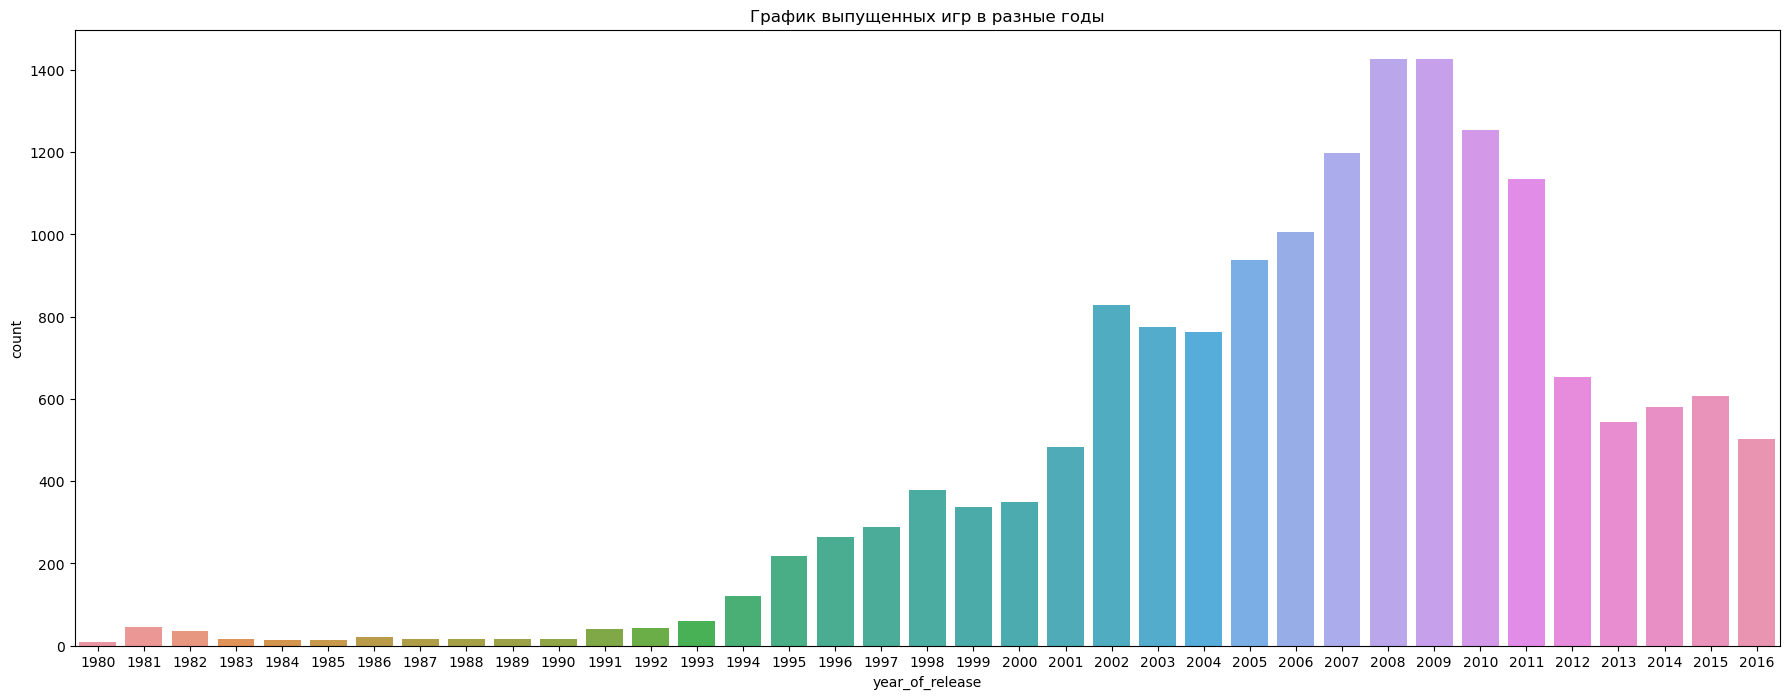

In [27]:
#Построим график
plt.subplots(figsize=(22, 8))
sns.barplot(data=rel, x=rel.index, y=rel['count'])
plt.title('График выпущенных игр в разные годы')
plt.show()

**Вывод по графику:**  
До 1994 года игр было очень мало. Потом количество начало постепенно расти. Наибольшее число игр было с 2007 по 2011 годы. Скорее всего, это связано с тем, что с развитием техники начала развиваться и игровая индустрия. После 2011 года произошёл спад игр, возможно из-за того, что рынок стал перенасыщен или игры стали не настолько интересными как это было раньше.  
  
Важными для нас данными будут значения с 2011 года по 2016 год включительно, т.к., выбрав более ранние годы в качестве начала актуального для нас периода, мы можем захватить непопулярные уже платформы для игр, которые были на пике в нулевых, а сейчас уже не использутся.

### Анализ платформ

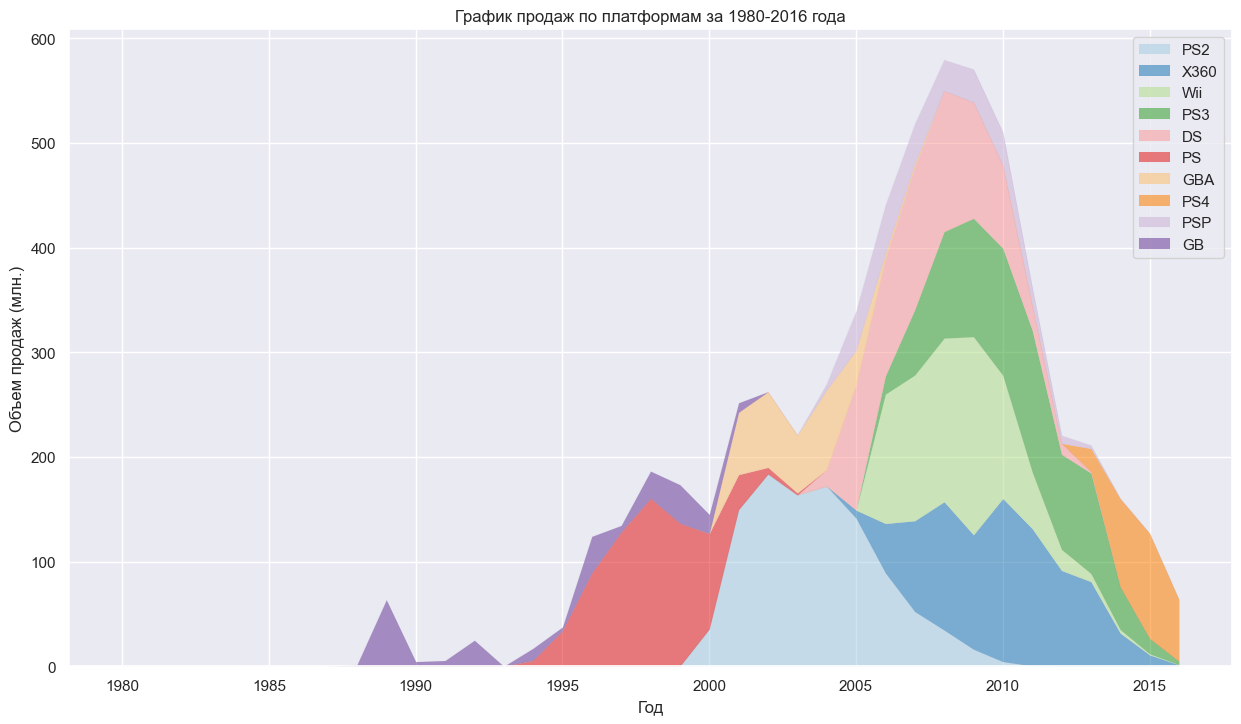

In [28]:
#Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы
#Выберем весь период с 1980 года по 2016 год, т.к. с 2011 по 2016 года появлялось и исчезало не так много платформ 
#Для анализа будет достаточно 10 платформ
dis_and_appear_platforms = (data[(data['year_of_release']<2017)&(data['year_of_release']>1979)]
                          .groupby('platform')[['all_sales']]
                          .sum())
dis_and_appear_platforms.sort_values(by = 'all_sales',ascending = False).head(10)
#Переведём top_platforms в список
dis_and_appear_platforms_list = dis_and_appear_platforms.sort_values(by = 'all_sales',ascending = False).head(10).index.to_list()
#Составим таблицу по продажам десяти самых прибыльных платформ
dis_sale_platforms = data.pivot_table(index=['year_of_release'], values=['all_sales'], columns='platform', aggfunc='sum', fill_value=0)
#dis_sale_platforms = dis_sale_platforms[(dis_sale_platforms.index<2017)&(dis_sale_platforms.index>1993)]
dis_sale_platforms = dis_sale_platforms.droplevel(None, axis=1)
dis_sale_platforms = dis_sale_platforms[dis_and_appear_platforms_list]
#Построим график распределения платформ с наибольшими продажами по годам
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_palette('Paired')
sns.set_style("darkgrid")
dis_sale_platforms.plot.area(alpha=0.55, linewidth = 0.01)
plt.title('График продаж по платформам за 1980-2016 года')
plt.xlabel('Год')
plt.ylabel('Объем продаж (млн.)')
plt.legend(loc='upper right')
plt.show()

**Вывод:**  
Судя по графику, платформы живут примерно 10 лет. Наибольшая продаваемость происходила через 4-5 лет после появления платформы. Так что в 2017 году нужно обращать внимание на платформы, появившиеся в 2012-2013 годах. Учитывая, что данные за 2016 год неполные, у доживших до 2016 года платформ, показатели могут быть выше, что будет оначать рост продаж этих платформ.

In [29]:
#Посмотрим на топ платформ по продажам за 2013-2016 года
#Ограничимся 10-ю платформами
top_platforms = (data[(data['year_of_release']<2017)&(data['year_of_release']>2012)]
                         .groupby('platform')[['all_sales']]
                         .sum())
top_platforms.sort_values(by = 'all_sales',ascending = False).head(10)

,all_sales
platform,
PS4,265.79
PS3,154.66
XOne,145.05
3DS,136.97
X360,124.69
WiiU,59.94
PC,36.47
PSV,29.73
Wii,12.54


In [30]:
#Переведём top_platforms в список
top_platforms_list = top_platforms.sort_values(by = 'all_sales',ascending = False).head(15).index.to_list()

In [31]:
#Составим таблицу по продажам десяти самых прибыльных платформ
sale_platforms = data.pivot_table(index=['year_of_release'], values=['all_sales'], columns='platform', aggfunc='sum', fill_value=0)
sale_platforms = sale_platforms[(sale_platforms.index<2017)&(sale_platforms.index>2012)]
sale_platforms = sale_platforms.droplevel(None, axis=1)
sale_platforms = sale_platforms[top_platforms_list]

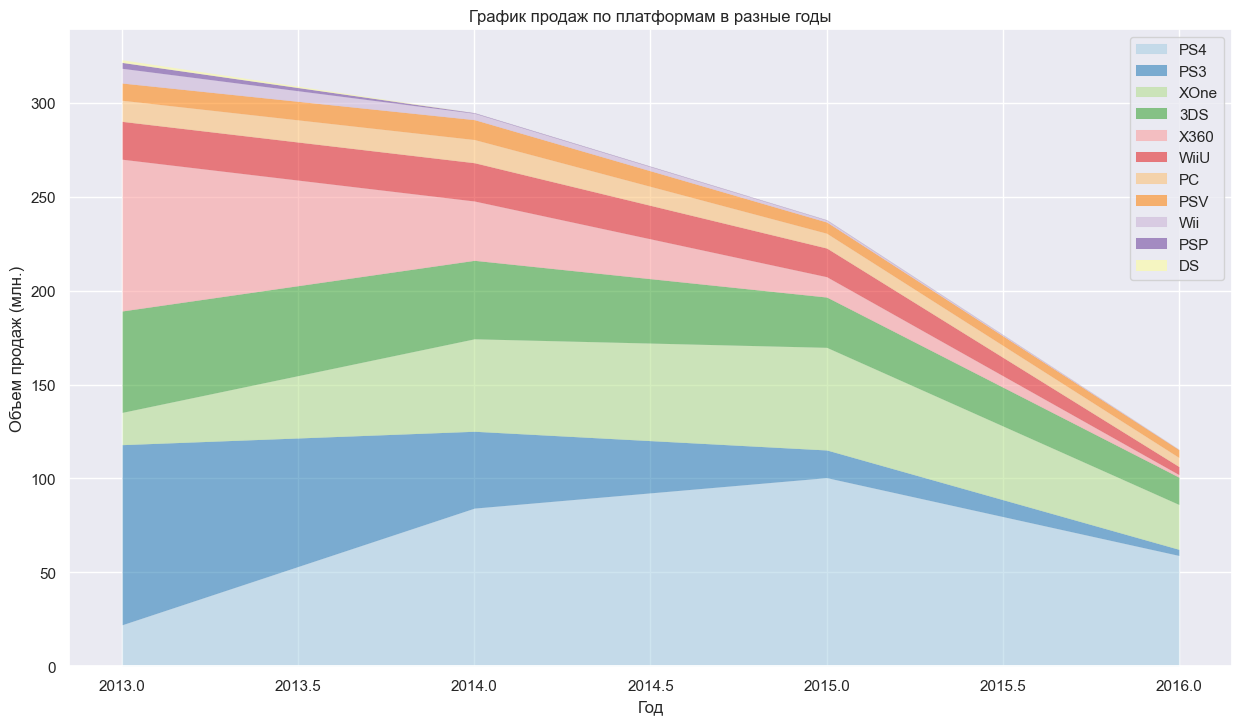

In [32]:
#Построим график распределения платформ с наибольшими продажами по годам
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_palette('Paired')
sns.set_style("darkgrid")
sale_platforms.plot.area(alpha=0.55, linewidth = 0.01)
plt.title('График продаж по платформам в разные годы')
plt.xlabel('Год')
plt.ylabel('Объем продаж (млн.)')
plt.legend(loc='upper right')
plt.show()

**Вывод:**  
Лидерами по продажам являются PS4, PS3, X360, 3DS, XOne. Судя по графику, растут продажи PS4, т.к. она недавно вышла и пока ещё на пике популярности. РС может подняться в 2017, учитывая её склонность к чередованию взлётов-падений. Wii, DS и PSP изжили своё ещё до 2015. PS3 падает, её затмевает недавно вышедшая PS4, пользующаяся большей популярностью своей предшественницы. XOne затмил Х360, Х360 скоро уйдёт с лидирующих позиций.
  
В 2017 скорее всего будут лидировать PS4 и XOne, как недавно вышедшие.

In [33]:
#Для дальнейшей работы создадим датасет с данными по актуальному для нас периоду С 2013 по 2016 годы
game_data = data[(data['year_of_release']>2012)&(data['year_of_release']<2017)]

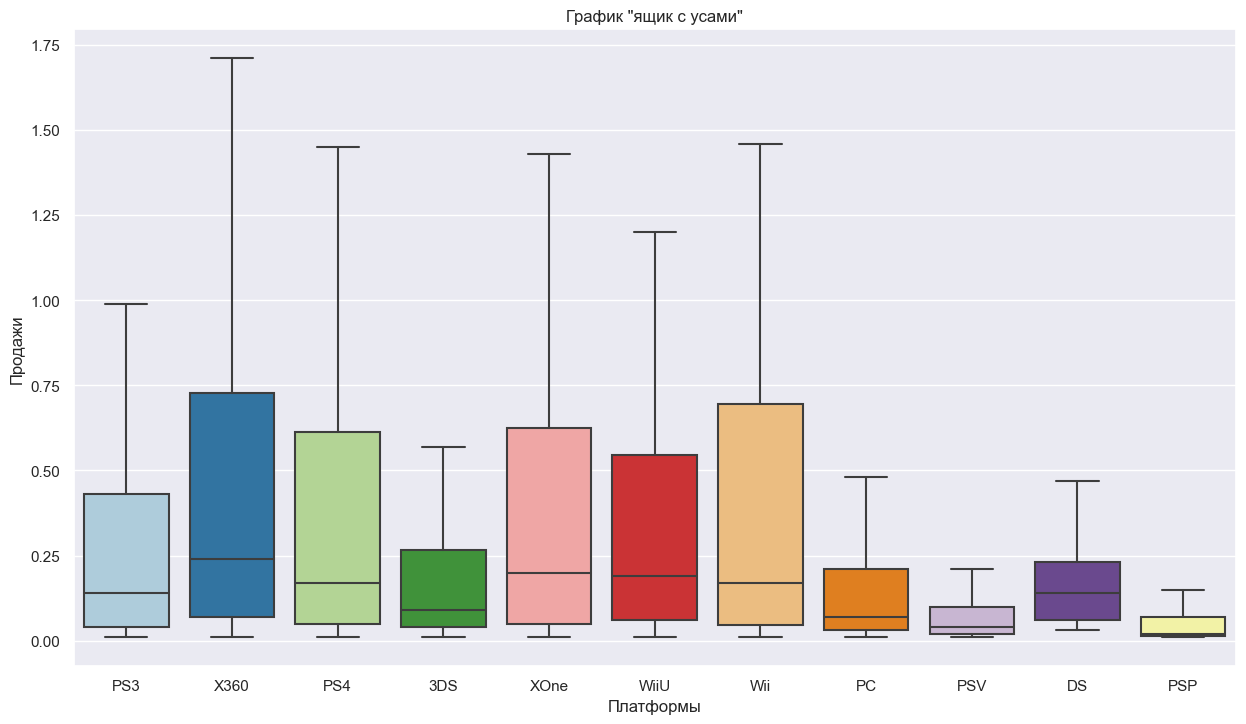

In [34]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам без выбросов
sns.boxplot(data=game_data, x='platform', y='all_sales', showfliers = False)
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('График "ящик с усами"')
plt.show()

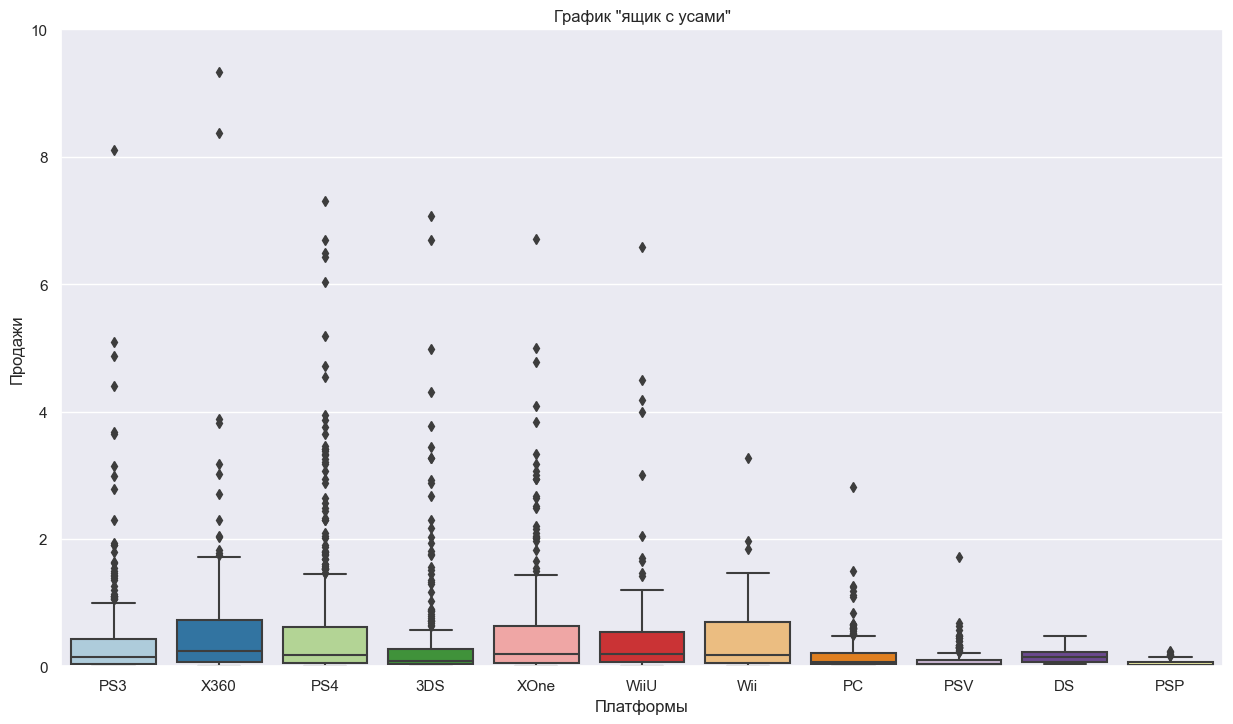

In [35]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам с выбросами
sns.boxplot(data=game_data, x='platform', y='all_sales', showfliers = True)
plt.ylim(0, 10)
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('График "ящик с усами"')
plt.show()

**Вывод:**  
У PS4 и XOne почти одинаковое медианное значение, что означает, что на этих платформах было продано примерно одинаковое количество игр, но XOne немного лидирует. Однако у PS4 хвост больше, а значит, игры на этой платформе продатся лучше, возможно, потому что они интересней (или графика лучше). Не отстаёт от этих платформ и WiiU. 
  
У Х360 и PS3 тоже большое количество продаж, но эти платформы уже устарели. У остальных платформ продажи идут не так хорошо.  
  
Самые хитовые игры были у Х360, 3DS, PS3, PS4, XOne и WiiU.

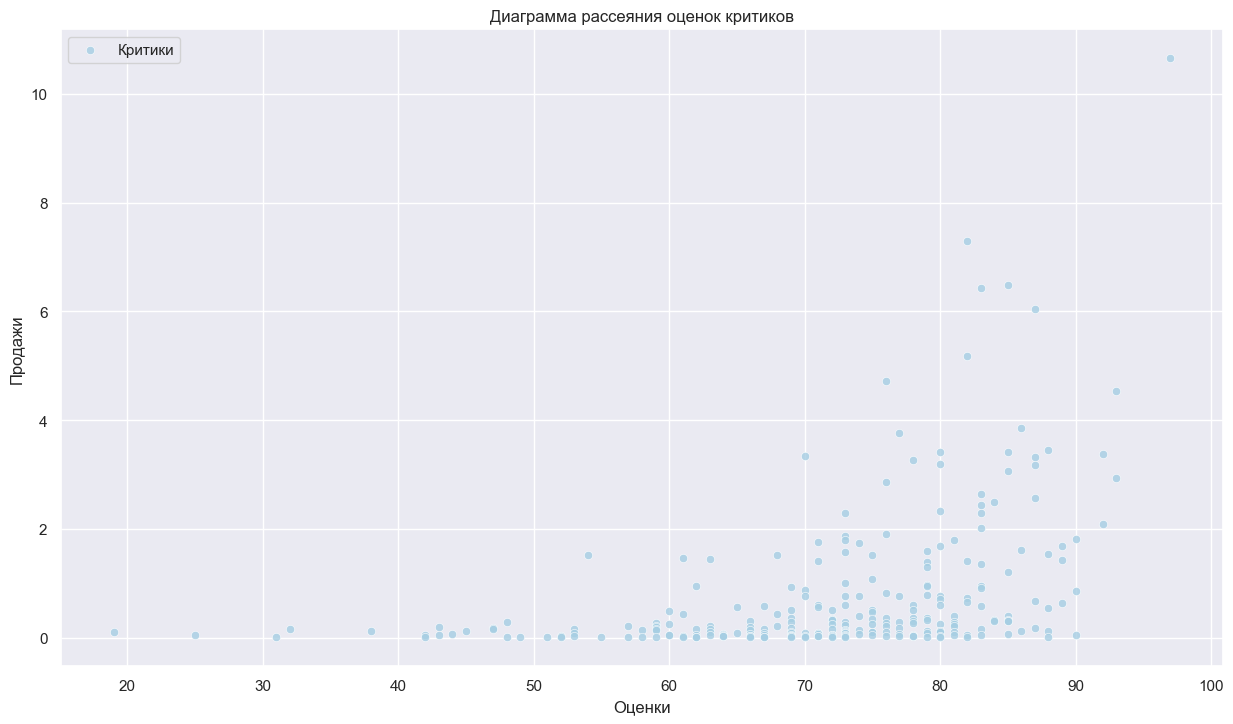

In [36]:
#Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
#Проведём анализ на основании платформы PS4
ps4_data_crit=game_data.query('platform == "PS4" and critic_score > 0')

#Построим диаграмму рассеяния для оценок критиков
sns.scatterplot(data=ps4_data_crit, y='all_sales', x='critic_score', alpha=0.8)
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.legend(['Критики', 'Пользователи'])
plt.title('Диаграмма рассеяния оценок критиков')
plt.show()

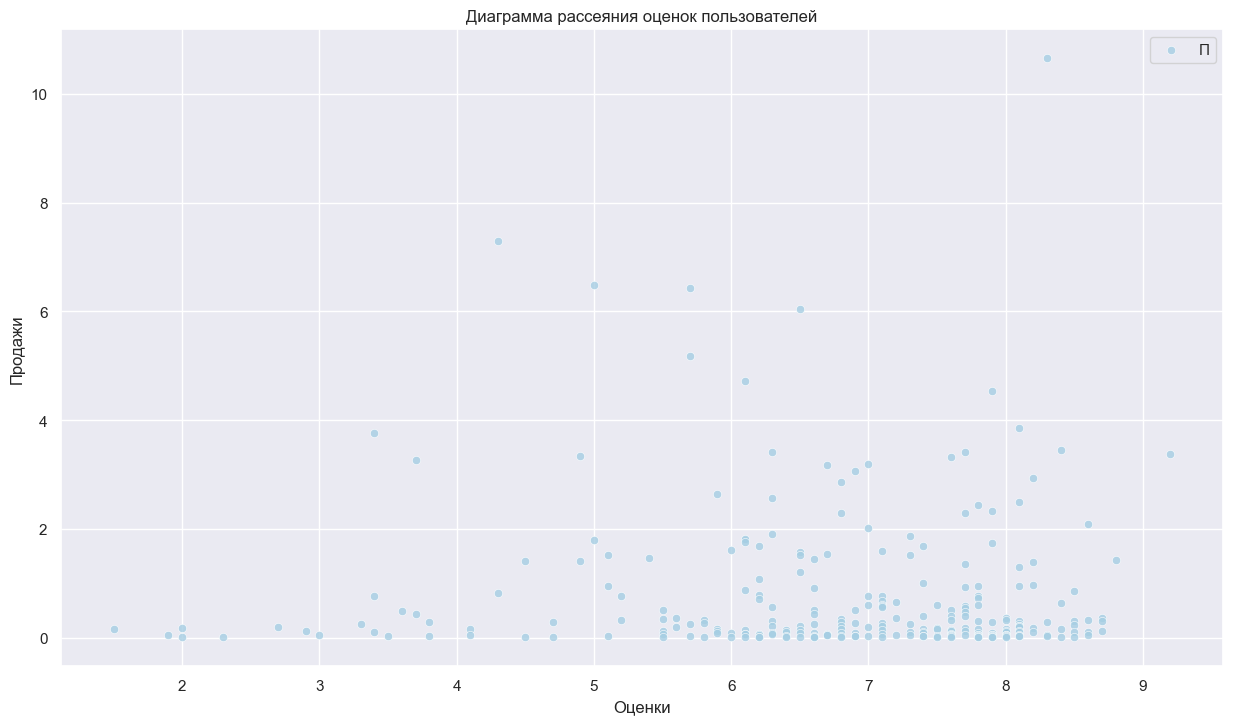

In [37]:
#Построим диаграмму рассеяния для оценок пользователей
ps4_data_user=game_data.query('platform == "PS4" and user_score > 0')

sns.scatterplot(data=ps4_data_user, y='all_sales', x='user_score', alpha=0.8)
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.legend('Пользователи')
plt.title('Диаграмма рассеяния оценок пользователей')
plt.show()

In [38]:
#Посчитаем корреляцию между отзывами и продажами
ps4_data=game_data.query('platform == "PS4"')
ps4_data[['user_score', 'critic_score', 'all_sales']].corr()

,user_score,critic_score,all_sales
user_score,1.000000,0.907449,0.115451
critic_score,0.907449,1.000000,0.225974
all_sales,0.115451,0.225974,1.000000


In [39]:
#Посчитаем корреляцию между отзывами и продажами платформах XOne, WiiU, 3DS для сравнения
xone_data=game_data.query('platform == "XOne"')
wiiu_data=game_data.query('platform == "WiiU"')
three_ds_data=game_data.query('platform == "3DS"')

display(xone_data[['user_score', 'critic_score', 'all_sales']].corr())
display(wiiu_data[['user_score', 'critic_score', 'all_sales']].corr())
three_ds_data[['user_score', 'critic_score', 'all_sales']].corr()

,user_score,critic_score,all_sales
user_score,1.000000,0.781040,0.121929
critic_score,0.781040,1.000000,0.274118
all_sales,0.121929,0.274118,1.000000


,user_score,critic_score,all_sales
user_score,1.000000,0.828502,0.239706
critic_score,0.828502,1.000000,0.292216
all_sales,0.239706,0.292216,1.000000


,user_score,critic_score,all_sales
user_score,1.000000,0.885053,0.042819
critic_score,0.885053,1.000000,0.058577
all_sales,0.042819,0.058577,1.000000


**Вывод:**  
Из графика видно, что пользователи практически не оценивают игры с большим количеством продаж, в отличие от критиков. Оценки и те, и другие ставят похожие. 
  
Корреляция показывает, что у продаж есть положительная зависимость от оценок критиков. От оценок пользователей продажи почти не зависят. Также видно, что есть зависимость между оценками пользователей и оценками критиков.  
  
Для других платформ дела обстоят также.

**Распределение игр по жанрам**

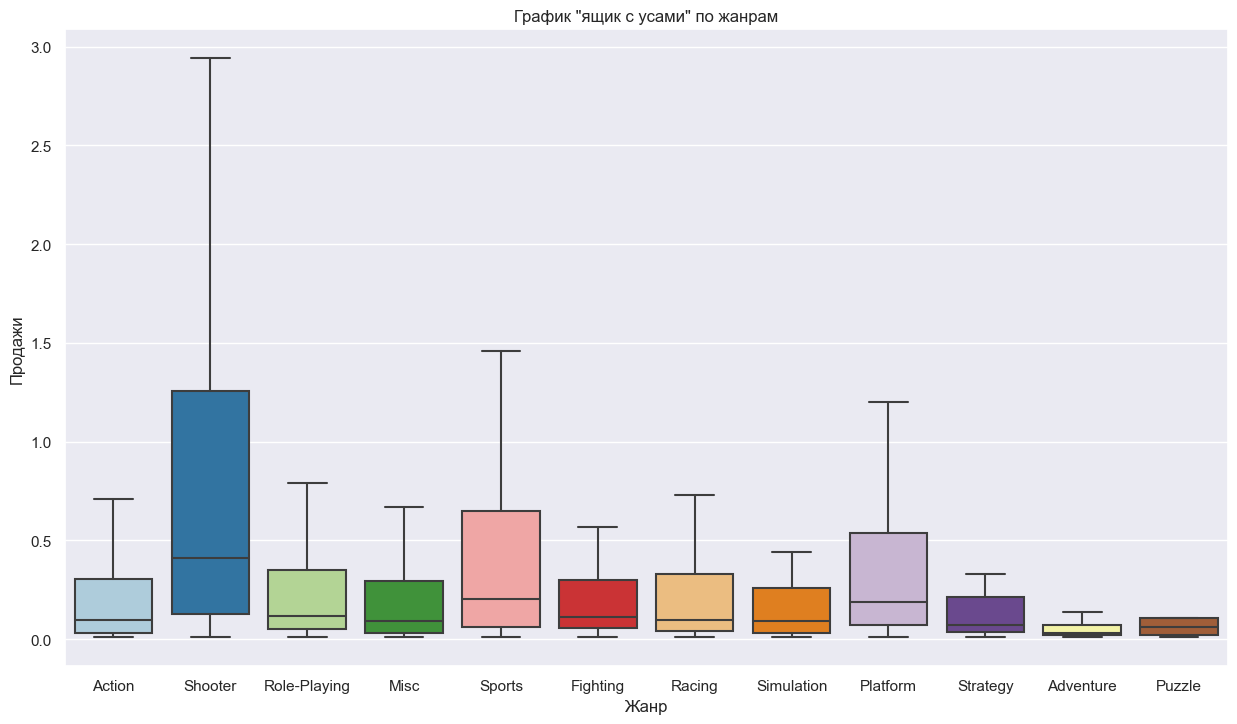

In [40]:
#Посмотрим на общее распределение игр по жанрам без выбросов
sns.boxplot(data=game_data, x='genre', y='all_sales', showfliers=False)
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.title('График "ящик с усами" по жанрам')
plt.show()

**Вывод:**  
Из усов видно, что прибыльнее всего шутеры (у этого жанра ус длиннее всех, значит и хитовых игр у него больше), на втором месте жанр "Platform", на третьем - "спорт", "файтинг" и гонки, их покаатели не особо различаются. Приключения являются самыми непопулярными. По продажам шутеры обгоняют приключения примерно в 10 раз.

# Шаг 4. Составим портрет пользователя каждого региона

### Анализ продаж по регионам

In [41]:
#Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы
top_jp = (game_data.groupby('platform')[['jp_sales']].sum())
top_eu = (game_data.groupby('platform')[['eu_sales']].sum())
top_na = (game_data.groupby('platform')[['na_sales']].sum())

In [42]:
#Выведем первые пять строк в каждом регионе
display(top_na.sort_values(by='na_sales', ascending=False).head())
display(top_eu.sort_values(by='eu_sales', ascending=False).head())
display(top_jp.sort_values(by='jp_sales', ascending=False).head())

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


**Вывод:**  
В Северной Америке популярнее всего Х360, в Европе - PS4, а в Японии предпочитают портативные консоли, которые менее популярны в других регионах (3DS на пятом месте в Америке и Европе). На первом месте в Японии - 3DS. Во всех трёх странах пока ещё полупярны PS3 и X360. Скоро их затмят нововышедшие PS4 и XOne.

In [43]:
#Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры
top_genre_jp = (game_data.groupby('genre')[['jp_sales']].sum())
top_genre_eu = (game_data.groupby('genre')[['eu_sales']].sum())
top_genre_na = (game_data.groupby('genre')[['na_sales']].sum())

In [44]:
#Выведем первые пять строк в каждом регионе
display(top_genre_na.sort_values(by='na_sales', ascending=False).head())
display(top_genre_eu.sort_values(by='eu_sales', ascending=False).head())
display(top_genre_jp.sort_values(by='jp_sales', ascending=False).head())

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


**Вывод:**  
В Северной Америке и Европе самые популярные жанры выглядят почти одинаково. В Японии предпочитают больше ролевые игры. Такие различия скорее всего из-за платформ, на которых играют пользователи. Хотя ролевые популярны и в Европе с Америкой. По продажам они примерно равны. Продаж в Японии в 2 раза меньше, чем в Америке и Европе.

**Рейтинги ESRB:**  
* EC (Early childhood) — Для детей младшего возраста
* E (Everyone) — Для всех
* E10+ (Everyone 10 and older) — Для всех от 10 лет и старше
* T (Teen) — Подросткам
* M (Mature) — Для взрослых
* AO (Adults Only 18+) — Только для взрослых
* RP (Rating Pending) — Рейтинг ожидается

C:\Users\Mc1air\AppData\Local\Temp\ipykernel_2728\1088322250.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=game_data, y='na_sales',  x='rating', alpha=0.6, ci=0)


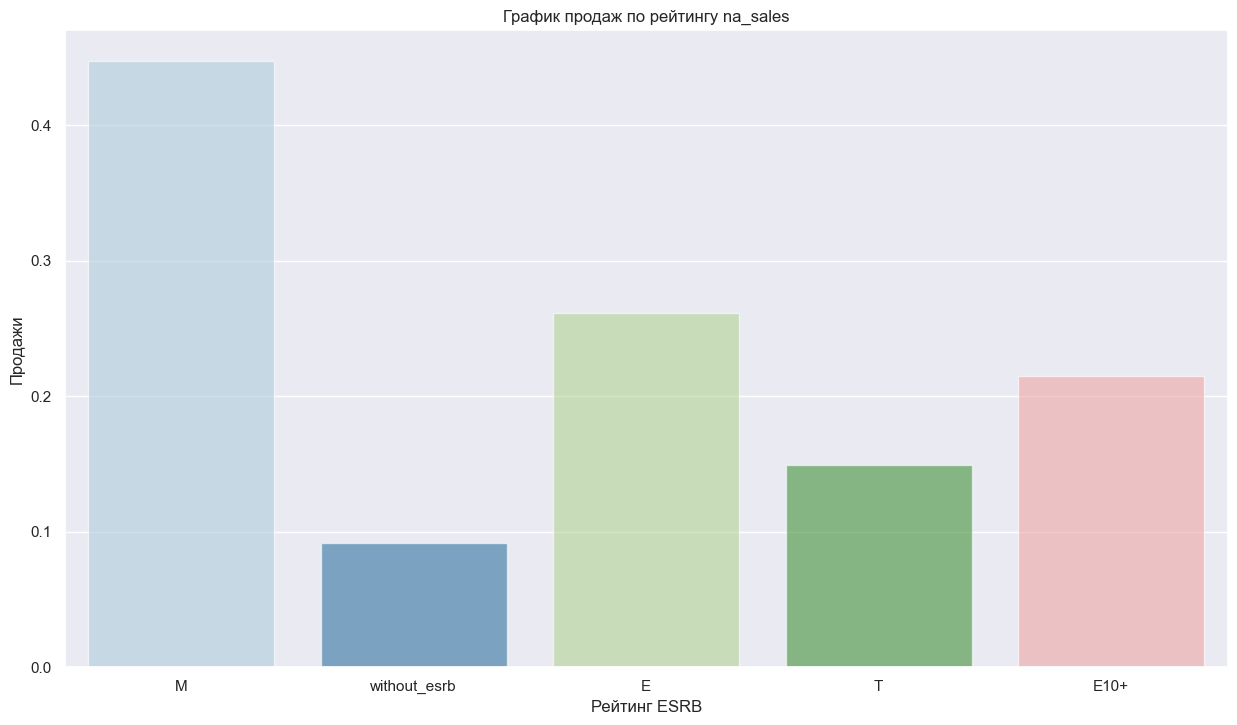

In [45]:
#Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе
#Построим график по региону na_sales
sns.barplot(data=game_data, y='na_sales',  x='rating', alpha=0.6, ci=0)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.title('График продаж по рейтингу na_sales')
plt.show()

C:\Users\Mc1air\AppData\Local\Temp\ipykernel_2728\66811073.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=game_data, y='jp_sales',  x='rating', alpha=0.6, ci=0)


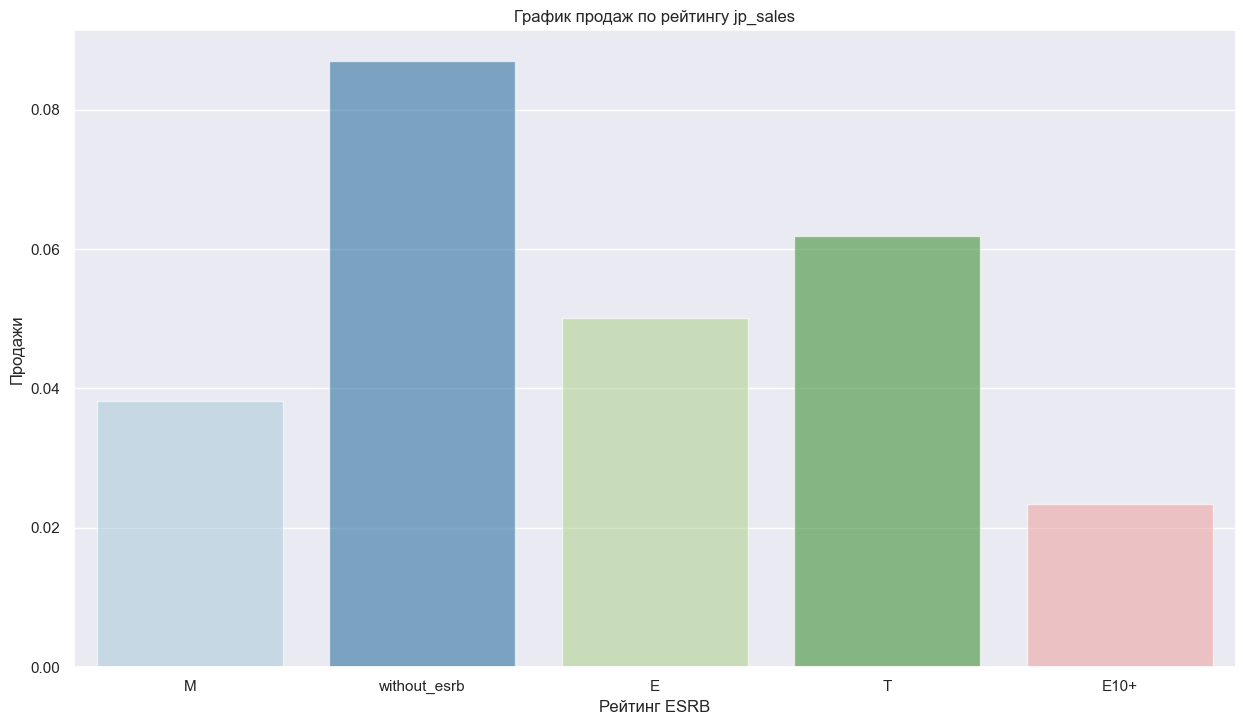

In [46]:
#Построим график по региону jp_sales
sns.barplot(data=game_data, y='jp_sales',  x='rating', alpha=0.6, ci=0)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.title('График продаж по рейтингу jp_sales')
plt.show()

C:\Users\Mc1air\AppData\Local\Temp\ipykernel_2728\2248202073.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=game_data, y='eu_sales',  x='rating', alpha=0.6, ci=0)


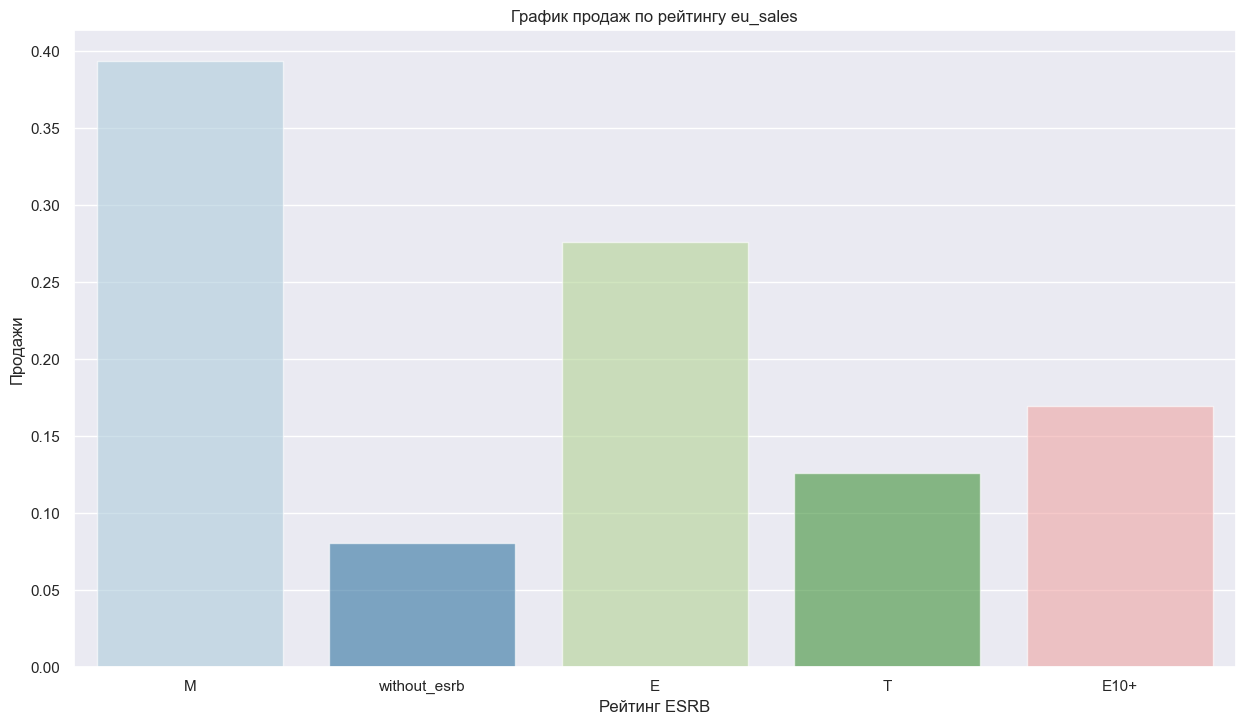

In [47]:
#Построим график по региону eu_sales
sns.barplot(data=game_data, y='eu_sales',  x='rating', alpha=0.6, ci=0)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.title('График продаж по рейтингу eu_sales')
plt.show()

**Вывод:**
В Америке и Европе преобладает рейтинг **М**, в Японии - **Е** и **Т** (они примерно на одном уровне). 

# Шаг 5. Проверим гипотезы

**1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Нулевая гипотеза предполагает, что между выборками нет различий, поэтому:
* Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC отличаются

Выберем стандартный критический уровень значимости - **alpha=.05**

In [48]:
#Проведём тест

xone_score = game_data.query('platform == "XOne" and user_score > 0')['user_score']
pc_score = game_data.query('platform == "PC" and user_score > 0')['user_score']

alpha = .05

results = st.ttest_ind(
    xone_score,
    pc_score,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [49]:
#Посмотрим на значения среднего
xone_pc = game_data.query('platform == "XOne" or platform == "PC"')
xone_pc.pivot_table(index='platform', values='user_score', aggfunc='mean')

,user_score
platform,
PC,4.961905
XOne,4.542105


**Вывод:**  
Различие между средними незначительное. Подтвердилась нулевая гипотеза, из которой следует, что средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий.

**2. Средние пользовательские рейтинги жанров Action и Sports разные**

**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports одинаковые  
**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports отличаются

Выберем стандартный критический уровень значимости - **alpha=.05**

In [50]:
action_score = game_data.query('genre == "Action" and user_score > 0')['user_score']
sports_score = game_data.query('genre == "Sports" and user_score > 0')['user_score']

alpha = .05

results = st.ttest_ind(
    action_score,
    sports_score,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


In [51]:
#Посмотрим на значения среднего
action_sports = game_data.query('genre == "Action" or genre == "Sports"')
action_sports.pivot_table(index='genre', values='user_score', aggfunc='mean')

,user_score
genre,
Action,2.980157
Sports,3.664019


**Вывод:**  
Подтвердилась альтернативная гипотеза, а значит, средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия.

## Шаг 6. Общий вывод

В ходе исследования было сделано:  
* Заменены пропуски в данных и удалены строки с малым количеством пропусков в столбцах
* Добавлен столбец с общей суммой продаж по всем регионам для более полного анализа
* Проведён анализ игр
* Проведён анализ платформ:
    + Платформы живут 7-10 лет
* Изучены зависимости продаж от отзывов критиков и пользователей:
    + Продажи зависимы от оценок критиков, но не от оценок пользователей
* Исследованы платформы и жанры по сумме продаж в каждом регионе
* Проведён анализ продаж по регионам
* Проверено влияние рейтинга ESRB на продажи по регионам
* Проверены гипотезы  
  
В 2017 году скорее всего выйет большое количество игр, но выручка от их продаж будет меньше. Многие разработчики перешли на создание игр для смартфонов. Нужно присмотреться к следующим жанрам: Shooter, Action, Sports, Roleplaying и misc.
В Японии на первых местах - портативные консоли (лидер - 3ds) и пользователи предпочитают ролевые игры.
В Америке и Европе лидируют стационарные платформы и пользователи предпочитают жанр Shooter.